In [1]:
%%capture
! pip intall seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from requests import get
from bs4 import BeautifulSoup
from time import sleep
from time import time
from random import randint
from scipy import stats
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
titles = []
authors = []
ratings = []
scores = []
voteds = []

In [3]:
start_time = time()
requests = 0

In [4]:
pages = [str(i) for i in range(1,66)]

In [5]:
for page in pages:       
    url = 'https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page='+page
    print(url)
    response = get(url)
    
    sleep(randint(10,25))
    
    requests += 1
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    
    soup = BeautifulSoup(response.text, 'html.parser')
    
    book_title_list = soup.find_all('a', class_='bookTitle')
    for x in book_title_list:
        title = x.span.text
        titles.append(title)
        
    author_list = soup.find_all('a', class_='authorName')
    for y in author_list:
        author = y.span.text
        authors.append(author)
        
    rating_list = soup.find_all('span', class_='minirating')
    for z in rating_list:
        rating = z.text[1:5]
        ratings.append(rating)
        
    score_list = soup.find_all('span', class_='smallText uitext')
    for az in score_list:
        score = az.a.text[7:]
        scores.append(score)
        
    voted_list = soup.find_all('span', class_='smallText uitext')
    for ay in voted_list:
        voted = ay.text[29:53]
        voteds.append(voted)

https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page=1
Request: 1; Frequency: 0.0019712604348456225 requests/s
https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page=2
Request: 2; Frequency: 0.0037344277109468507 requests/s
https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page=3
Request: 3; Frequency: 0.0054147347675137765 requests/s
https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page=4
Request: 4; Frequency: 0.006832047771636645 requests/s
https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page=5
Request: 5; Frequency: 0.008276636862693412 requests/s
https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page=6
Request: 6; Frequency: 0.009599658102997158 requests/s
https://www.goodreads.com/list/show/4093.Best_Books_of_the_Decade_2010_s?page=7
Request: 7; Frequency: 0.010718074095243287 requests/s
https://www.goodreads.com/list/show/4093.Best_Books_

In [6]:
goodreads = pd.DataFrame({'Book_Title': titles,
'Author': authors,
'Rating': ratings,
'Score': scores,
'People_Voted': voteds
})

In [7]:
goodreads.to_csv('Goodreads.csv')

In [8]:
df = pd.read_csv('Goodreads.csv')
df

,Unnamed: 0,Book_Title,Author,Rating,Score,People_Voted
0,0,The Fault in Our Stars,John Green,4.23,"195,861","and\n1,982 people voted"
1,1,"Divergent (Divergent, #1)",Veronica Roth,4.21,"144,195","and\n1,472 people voted"
2,2,"Mockingjay (The Hunger Games, #3)",Suzanne Collins,4.03,"136,546","and\n1,399 people voted"
3,3,Gone Girl,Gillian Flynn,4.06,"120,022","and\n1,223 people voted"
4,4,The Martian,Andy Weir,4.40,"114,305","and\n1,164 people voted"
5,5,All the Light We Cannot See,Anthony Doerr,4.33,"90,511",and\n924 people voted\n
6,6,"Ready Player One (Ready Player One, #1)",Ernest Cline,4.28,"89,721",and\n915 people voted\n
7,7,"Clockwork Angel (The Infernal Devices, #1)",Cassandra Clare,4.33,"85,660",and\n875 people voted\n
8,8,"Cinder (The Lunar Chronicles, #1)",Marissa Meyer,4.15,"80,572",and\n835 people voted\n
9,9,"Me Before You (Me Before You, #1)",Jojo Moyes,4.26,"75,414",and\n779 people voted\n


In [9]:
del df['Unnamed: 0']
df['Score'] = df['Score'].str.replace(r'\D', '')
df['Score'] = df['Score'].astype(np.int64)
df['Rating'] = df['Rating'].str.replace('eall','4.00')
df['Rating'] = df['Rating'].str.replace('t wa','5.00')
df['Rating'] = df['Rating'].str.replace('iked','3.00')
df['Rating'] = df['Rating'].str.replace(r'\D', '')
df['Rating'] = df['Rating'].astype(np.int64)
df['Rating'] = df['Rating']/100
df['People_Voted'] = df['People_Voted'].str.replace(r'\D', '')
df['People_Voted'] = df['People_Voted'].astype(np.int64)

In [10]:
df

,Book_Title,Author,Rating,Score,People_Voted
0,The Fault in Our Stars,John Green,4.23,195861,1982
1,"Divergent (Divergent, #1)",Veronica Roth,4.21,144195,1472
2,"Mockingjay (The Hunger Games, #3)",Suzanne Collins,4.03,136546,1399
3,Gone Girl,Gillian Flynn,4.06,120022,1223
4,The Martian,Andy Weir,4.40,114305,1164
5,All the Light We Cannot See,Anthony Doerr,4.33,90511,924
6,"Ready Player One (Ready Player One, #1)",Ernest Cline,4.28,89721,915
7,"Clockwork Angel (The Infernal Devices, #1)",Cassandra Clare,4.33,85660,875
8,"Cinder (The Lunar Chronicles, #1)",Marissa Meyer,4.15,80572,835
9,"Me Before You (Me Before You, #1)",Jojo Moyes,4.26,75414,779


In [11]:
author_preScore = df['Score'].groupby(df['Author'])
rate = author_preScore.sum()
rate.sort_values(ascending=False)

Author
Cassandra Clare              322563
Rick Riordan                 250850
Veronica Roth                250420
John Green                   200722
Sarah J. Maas                190417
Marissa Meyer                144649
Suzanne Collins              138144
Gillian Flynn                120096
Andy Weir                    115324
Rainbow Rowell               106119
Anthony Doerr                 90939
Ernest Cline                  89855
Jojo Moyes                    79120
Kiera Cass                    78645
Erin Morgenstern              72260
Stephen King                  68229
George R.R. Martin            64394
Ransom Riggs                  62847
Emma Donoghue                 57650
Richelle Mead                 57398
Lauren Oliver                 57281
Marie Lu                      54095
Paula Hawkins                 54055
Brandon Sanderson             53861
R.J. Palacio                  52966
Patrick Rothfuss              52070
Donna Tartt                   51085
Laura Hillenbrand    

In [12]:
df[['Rating', 'Score', 'People_Voted']].corr()

,Rating,Score,People_Voted
Rating,1.000000,0.051840,0.052493
Score,0.051840,1.000000,0.999657
People_Voted,0.052493,0.999657,1.000000


(0, 213190.20524438264)

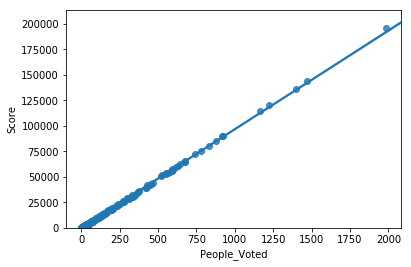

In [13]:
sns.regplot(x='People_Voted', y='Score', data=df)
plt.ylim(0,)

In [14]:
pearson_coef, p_value = stats.pearsonr(df['People_Voted'], df['Score'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.9996570362963848  with a P-value of P = 0.0


Karena p-value < 0.001 , korelasi antara People_Voted dan Score secara statistik , dan hubungan linearnya adalah ~0,99966 maka kedua variabel tersebut berkorelasi kuat.

(0, 5.256670233310882)

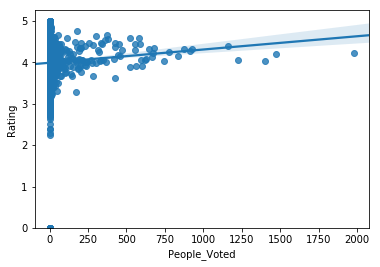

In [15]:
sns.regplot(x='People_Voted', y='Rating', data=df)
plt.ylim(0,)

In [16]:
pearson_coef, p_value = stats.pearsonr(df['People_Voted'], df['Rating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.052492611314410194  with a P-value of P = 2.6097161142543097e-05


Karena hubungan linearnya adalah ~0,0524 maka kedua variabel tersebut berkorelasi lemah.

(0, 5.256670233310882)

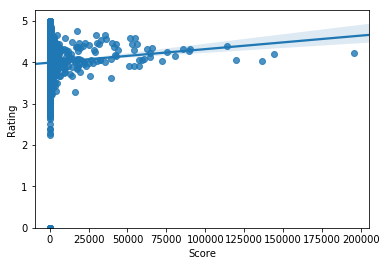

In [17]:
sns.regplot(x='Score', y='Rating', data=df)
plt.ylim(0,)

In [18]:
pearson_coef, p_value = stats.pearsonr(df['Score'], df['Rating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.05183985679849466  with a P-value of P = 3.285267687010784e-05


Karena hubungan linearnya adalah ~0,052 maka kedua variabel tersebut berkorelasi lemah.

In [19]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
X = df[['People_Voted']]
Y = df['Score']

In [21]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
Yhat=lm.predict(X)
Yhat[0:5]

array([191742.94204579, 142390.90883991, 135326.79428299, 118295.50439233,
       112586.15153126])

In [23]:
lm.intercept_

-52.60660922982254

In [24]:
lm.coef_

array([96.76869256])

Jadi, estimasi akhir dari model regresi linear yang kita dapatkan adalah
Score = -52.60660922982254 + 96.76869256(People_Voted)